In [2]:
# Imports
# (1) pandas for reading the file
# (2) matplotlib for plotting
# (3) numpy for numerical python: Mathematical functions, arrays

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

wdf = pd.read_csv("data-files/WeatherDataPolynomial.csv")
display(wdf.head())
display(wdf.info())

,Pressure (millibars),Humidity
0,1014.40,0.62
1,1014.20,0.66
2,1014.47,0.79
3,1014.45,0.82
4,1014.49,0.83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Pressure (millibars)  25 non-null     float64
 1   Humidity              25 non-null     float64
dtypes: float64(2)
memory usage: 528.0 bytes


None

In [3]:
# Renaming the columns
wdf.rename(columns={'Pressure (millibars)':'Pressure', 'Humidity':'Humidity'}, inplace=True)
wdf.head()

,Pressure,Humidity
0,1014.40,0.62
1,1014.20,0.66
2,1014.47,0.79
3,1014.45,0.82
4,1014.49,0.83


(array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

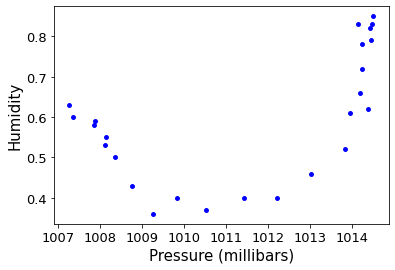

In [4]:
# Data visualization: 
    # Check if Linear regression is applicable --> By plotting it

plt.scatter(wdf.Pressure, wdf.Humidity, s = 15, c = "blue") # scatter Plot --> dots/points
plt.xlabel("Pressure (millibars)", fontsize=15)
plt.ylabel("Humidity", fontsize=15)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13, rotation=0)

In [5]:
from sklearn.linear_model import LinearRegression

# Prepare data to input as an argument in LinReg model (2d-array)
features_df = wdf[['Pressure']]
target_val   = wdf.Humidity

# Other option for reshaping the data (2 make it 2-d array)
    # if the data has only one point --> .reshape(1,-1)
    # (1) features_df = wdf['temp'].values.reshape(-1,1) # --> convert to 2d array
    # (2) features_df = pd.DataFrame({'temp': wdf.temp}) # --> create dataframe
    # display(features_df) # finally you can display your data

display(features_df.head())
display(target_val.head())

,Pressure
0,1014.40
1,1014.20
2,1014.47
3,1014.45
4,1014.49


0    0.62
1    0.66
2    0.79
3    0.82
4    0.83
Name: Humidity, dtype: float64

# Lets apply linear regression to see the wrong result !


Intercept: -30.33347021070683, coeffecient: [0.03057561]

Mean Absolute Error = 0.11629240464838583



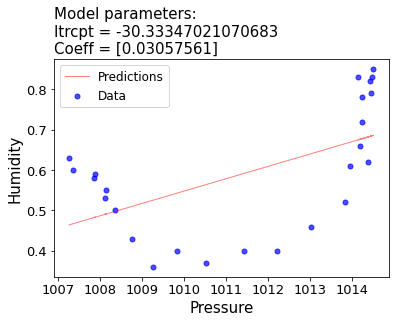

In [6]:
# Previously defined: 
features_df = wdf[['Pressure']]
target_val  = wdf.Humidity

from sklearn.metrics import mean_absolute_error

# Define the model
# LinearRegression(fit_intercept=True, normalize=False, copy_X=True)
reg_model = LinearRegression()


# fitting
reg_model.fit(features_df, target_val)
# Print fitted parameters
print(f"\nIntercept: {reg_model.intercept_}, coeffecient: {reg_model.coef_}")


# What is the prediction ?
        # Note: Make sure 'regressor (feature)' is again in the dataframe format
prediction = reg_model.predict(wdf[['Pressure']])
#display(prediction)


# What is the Error?
error = mean_absolute_error(target_val, prediction)
print(f"\nMean Absolute Error = {error}\n")


# How does prediction looks like? Actual Vs prediction
    # --> Plot it with the actual data
        # Plot options: s = point size, c = point color, alpha = transparency  
plt.scatter(wdf.Pressure, wdf.Humidity, s = 25, c = "blue", alpha = 0.7, label = "Data")
plt.xlabel("Pressure", fontsize=15)
plt.ylabel("Humidity", fontsize=15)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13, rotation=0)
plt.title(f"Model parameters:\nItrcpt = {reg_model.intercept_}\nCoeff = {reg_model.coef_}",\
          loc='left', fontsize=15)


plt.plot(wdf.Pressure, prediction, c = "red", lw = 1, alpha = 0.5, label = "Predictions")

plt.legend(fontsize=12, loc = 0) # loc -> location [0, 10]

# We have to apply Polynomial Regression:
# $h_\beta (x) = \beta_0 + \beta_1 x_1 + \beta_2 x_1^2$

# For that, we have to transform (pre-process) our data

In [9]:
from sklearn.preprocessing import PolynomialFeatures

pre_process      = PolynomialFeatures(degree = 2)
poly_features_df = pre_process.fit_transform(features_df)

display(features_df)
display(poly_features_df)

,Pressure
0,1014.40
1,1014.20
2,1014.47
3,1014.45
4,1014.49
5,1014.52
6,1014.16
7,1014.24
8,1014.25
9,1013.96


array([[1.00000000e+00, 1.01440000e+03, 1.02900736e+06],
       [1.00000000e+00, 1.01420000e+03, 1.02860164e+06],
       [1.00000000e+00, 1.01447000e+03, 1.02914938e+06],
       [1.00000000e+00, 1.01445000e+03, 1.02910880e+06],
       [1.00000000e+00, 1.01449000e+03, 1.02918996e+06],
       [1.00000000e+00, 1.01452000e+03, 1.02925083e+06],
       [1.00000000e+00, 1.01416000e+03, 1.02852051e+06],
       [1.00000000e+00, 1.01424000e+03, 1.02868278e+06],
       [1.00000000e+00, 1.01425000e+03, 1.02870306e+06],
       [1.00000000e+00, 1.01396000e+03, 1.02811488e+06],
       [1.00000000e+00, 1.01385000e+03, 1.02789182e+06],
       [1.00000000e+00, 1.01304000e+03, 1.02625004e+06],
       [1.00000000e+00, 1.01222000e+03, 1.02458933e+06],
       [1.00000000e+00, 1.01144000e+03, 1.02301087e+06],
       [1.00000000e+00, 1.01052000e+03, 1.02115067e+06],
       [1.00000000e+00, 1.00983000e+03, 1.01975663e+06],
       [1.00000000e+00, 1.00926000e+03, 1.01860575e+06],
       [1.00000000e+00, 1.00876

# Now apply Regression with third column, $P^2$


Intercept: 29167.74604378328, coeffecient: [ 0.00000000e+00 -5.77225454e+01  2.85583573e-02]

Mean Absolute Error = 0.04622925447876915



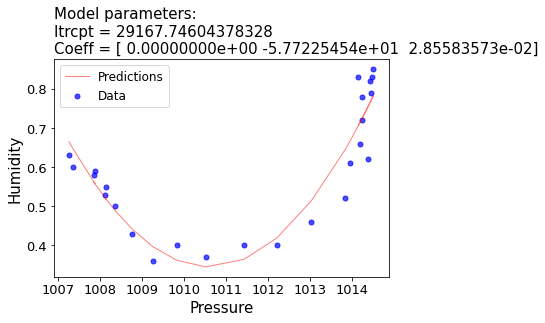

In [22]:
# Remenber we have preprocessed the data
# poly_features_df = pre_process.fit_transform(features_df)

# Again define the model
reg_model = LinearRegression()


# fitting of pre-processed (polynomial) data
reg_model.fit(poly_features_df, target_val)
# Print fitted parameters
print(f"\nIntercept: {reg_model.intercept_}, coeffecient: {reg_model.coef_}")


# What is the prediction ?
        # Remember we have defined out pre-processed features
        # poly_features_df = pre_process.fit_transform(features_df)
prediction = reg_model.predict(poly_features_df)
#display(prediction)


# What is the Error?
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(target_val, prediction)
print(f"\nMean Absolute Error = {error}\n")


# How does prediction looks like? Actual Vs prediction
    # --> Plot it with the actual data
        # Plot options: s = point size, c = point color, alpha = transparency  
plt.scatter(wdf.Pressure, wdf.Humidity, s = 25, c = "blue", alpha = 0.7, label = "Data")
plt.xlabel("Pressure", fontsize=15)
plt.ylabel("Humidity", fontsize=15)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13, rotation=0)
plt.title(f"Model parameters:\nItrcpt = {reg_model.intercept_}\nCoeff = {reg_model.coef_}",\
          loc='left', fontsize=15)


plt.plot(wdf.Pressure, prediction, c = "red", lw = 1, alpha = 0.5, label = "Predictions")

plt.legend(fontsize=12, loc = 0) # loc -> location [0, 10]


Predicted value of Humidity at temp 1013.5 [K] is: 0.5839638288889546


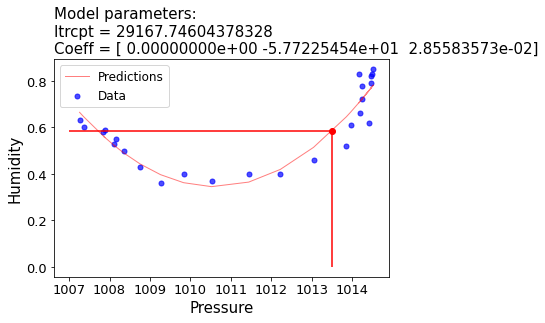

In [35]:
plt.scatter(wdf.Pressure, wdf.Humidity, s = 25, c = "blue", alpha = 0.7, label = "Data")
plt.xlabel("Pressure", fontsize=15)
plt.ylabel("Humidity", fontsize=15)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13, rotation=0)
plt.title(f"Model parameters:\nItrcpt = {reg_model.intercept_}\nCoeff = {reg_model.coef_}",\
          loc='left', fontsize=15)


plt.plot(wdf.Pressure, prediction, c = "red", lw = 1, alpha = 0.5, label = "Predictions")

plt.legend(fontsize=12, loc = 0) # loc -> location [0, 10]


# ====================================================================================
# Prediction at a given value
pres1      = 1013.5

# prediction = reg_model.predict([pres1]) 
    # --> DOES NOT WORK: We can't do prediction 
    # because we have not pre-processed this data


# Remember how we pre-processed the data:
pred1 = reg_model.predict(pre_process.fit_transform([[pres1]]))

print(f"\nPredicted value of Humidity at temp {pres1} [K] is: {pred1[0]}")

plt.scatter(pres1, pred1, color ='r', label = "predicted value")
plt.vlines(x = pres1, ymin = 0.0, ymax = pred1, color = 'r')
plt.hlines(y = pred1, xmin = 1007.0, xmax = pres1, color = 'r')

# ====================================================================================